## Scenario

You worked on creating market segmentation groups using kmeans on customer shopping records, but you're not sure kmeans was the best method. By the end of this lesson, you want to find the appropriate number of groups and their descriptions.

# Hierarchical Clustering 
Agenda today:
- Hierarchical Clustering 
    -  Introduction
    -  How the algorithm is constructed
    -  Implementing hierarchical algorithm

Goals today:
- Understand how hierarchical clustering finds clusterings in observations
- Compare and contrast hierarchical clustering and k-means
- Build and interpret a dendrogram
***

# Introduction 

### Supervised vs. Unsupervised Machine Learning 
Recall from our previous lesson in supervised learning, where we use a number of features to predict a label. In unsupervised ML problem, we are not predicting and labels, thus we do not have a ground truth to compare our models to. In other words, we are doing the best we can to group individual observations together without having a gold standard to evaluate them. 

In [ ]:
# we dont have access to y column
# we dont have labeled data

### Intuition
Clustering is a family of techniques for identifying clusters in a dataset. The goal of clustering is to group the most similar observations together into a cluster. In Hierarchical Clustering, we prioritize **similarity** between individual observations.


### PCA vs. Clustering
Both PCA and clustering are unsupervised algorithms. The difference, according to _Introduction to Statistical Learning in  R_, is that:
- PCA looks to find low-dimensional representation of the observations that explain a good fraction of the variance 
- Clustering looks to find homogenous subgroups among the observations
***

# Hierarchical Agglomerative Clustering
Recall K-means clustering where the goal is to assign individual observations to a pre-specified number of clusters according to Euclidean distance between the centroid and the observation. Hierarchical clustering sets out to group the most similar two observations together from a bottom-up level. We end up with a tree-like diagram called a **dendrogram**, which allows us to view the clusterings obtained for each possible number of clusters, from 1 to n. It is up to our discretion as data scientists to decide how many clusters we want. 

![dendo](dendogram.png)

***
One disadvantage of K-means clustering is that we have to specify the number of clusters beforehand. The type of hierchical clustering we will learn today is **agglomerative**, or **bottom-up**, such that we do not have to specify the number of clusters beforehand. We will now dive into the details of hierchical clustering.

There is also **top-down** or **divisive** clustering, where one starts with the entire dataset as a single cluster.
***

### How does the algorithm work
Initially, every observation is its own cluster. As we move up the leaf of the dendrogram, the two most similar observations fuse together, and then the next most similar clusters fuse together etc. until everything fuses together into a big cluster. Where to stop is up to our discretion. 

![dendo2](400_Basic_Dendrogram.png)

## Agglomerative example

In [1]:
from hier_example import *

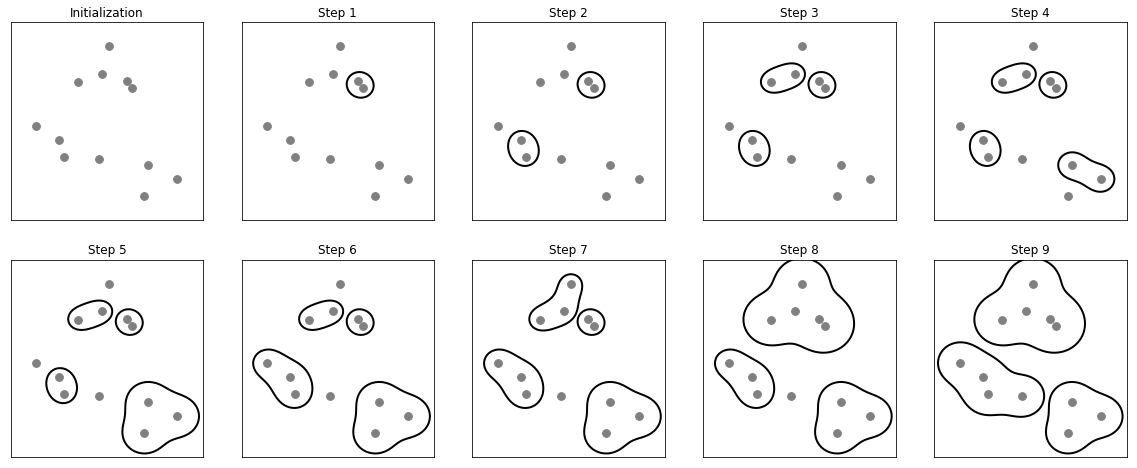

In [2]:
plot_agglomerative_algorithm()

### Types of hierarchical agglomerative clustering 
- Single Linkage 
    -  Minimum pair-wise distance: for any two clusters, take one observation from each and determine their distance. Do this over and over, until you have identified the overall minimum pair-wise distance. 
- Complete Linkage
    -  Complete linkage may be defined as the furthest (or maximum) distance between two clusters. That is, all possible pairwise distances between elements (one from cluster A and one from B) are evaluated and the largest value is used as the distance between clusters A & B. This is sometimes called complete linkage and is also called furthest neighbor.
- Average Linkage
    - The distance between clusters is defined as the average distance between the average values of each of the data points in the clusters. 
- Ward Linkage
    -  Ward method finds the pair of clusters that leads to minimum increase in total within-cluster variance after merging at each step.

I really like how **[this article](https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec)** describes the pros and cons of each approach.

### How well does the dendrogram fit the data?

One way of computing this is by means of the **cophenetic correlation coefficient**, which, in a word, is a measure of "how faithfully the dendrogram preserves the pairwise distances between the \[datapoints\]" -- [Wikipedia](https://en.wikipedia.org/wiki/Cophenetic_correlation).

The cophenetic correlation coefficient $c$ is given by [ref](https://www.mathworks.com/help/stats/index.html?/access/helpdesk/help/toolbox/stats/cophenet.html=)

![c-coef](cophenet.png)


$x(i, j) = | Xi − Xj |$, the ordinary Euclidean distance between the $i$th and $j$th observations.<br>
$t(i, j)$ = the dendrogrammatic distance between the model points $Ti$ and $Tj$. This distance is the height of the node at which these two points are first joined together.<br>

Then, letting ${\bar {x}}$ be the average of the $x(i, j)$, and letting ${\bar {t}}$ be the average of the $t(i, j)$, the cophenetic correlation coefficient $c$ is given by[4]

This is complicated! [This site](https://people.revoledu.com/kardi/tutorial/Clustering/Online-Hierarchical-Clustering.html) is helpful on how to understand the cophenetic correlation, and, indeed, on hierarchical clustering generally.

## Seeing it in action

**[This post here](https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/)** walks through cluster assignment _step_ by _step_ if the demo would be helpful.

9

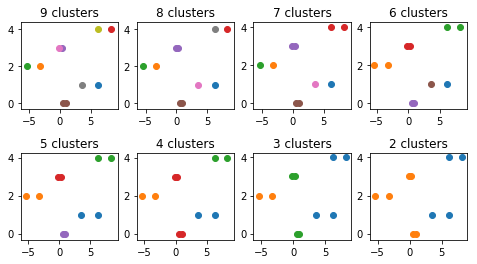

In [5]:
# Importing agglom_clust.py

from sklearn.datasets import make_blobs
from agglom_clust import centrAggClust as ac

X, Y = make_blobs(n_samples=10, n_features=1, centers=5, random_state=3)
ac(X, Y)

4

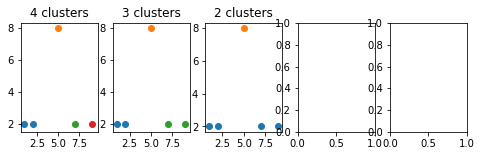

In [4]:
X2 = [1, 2, 5, 7, 9]
Y2 = [2, 2, 8, 2, 2]

ac(X2, Y2)

Meanwhile, we can do it in _**scipy**_ and _**sklearn**_

### Hierarchical clustering with `scipy`

(150, 2)


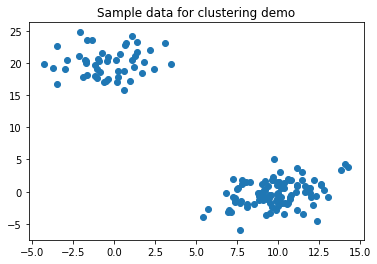

In [7]:
# Let's generate some data and look at an example of
# hierarchical agglomerative clustering

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# generate two clusters: a with 100 points, b with 50:
np.random.seed(1000)

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)

print(X.shape)  # 150 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.title("Sample data for clustering demo");

In [8]:
# construct dendrogram in scipy
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, 'single')

In [9]:
Z.shape

(149, 4)

Z contains the dendrogram in coded form! Its third column has distances. https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

In [10]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.9786391269542297

In [11]:
coph_dists[:5]

array([0.59994881, 0.49632455, 0.544156  , 0.6004741 , 0.6004741 ])

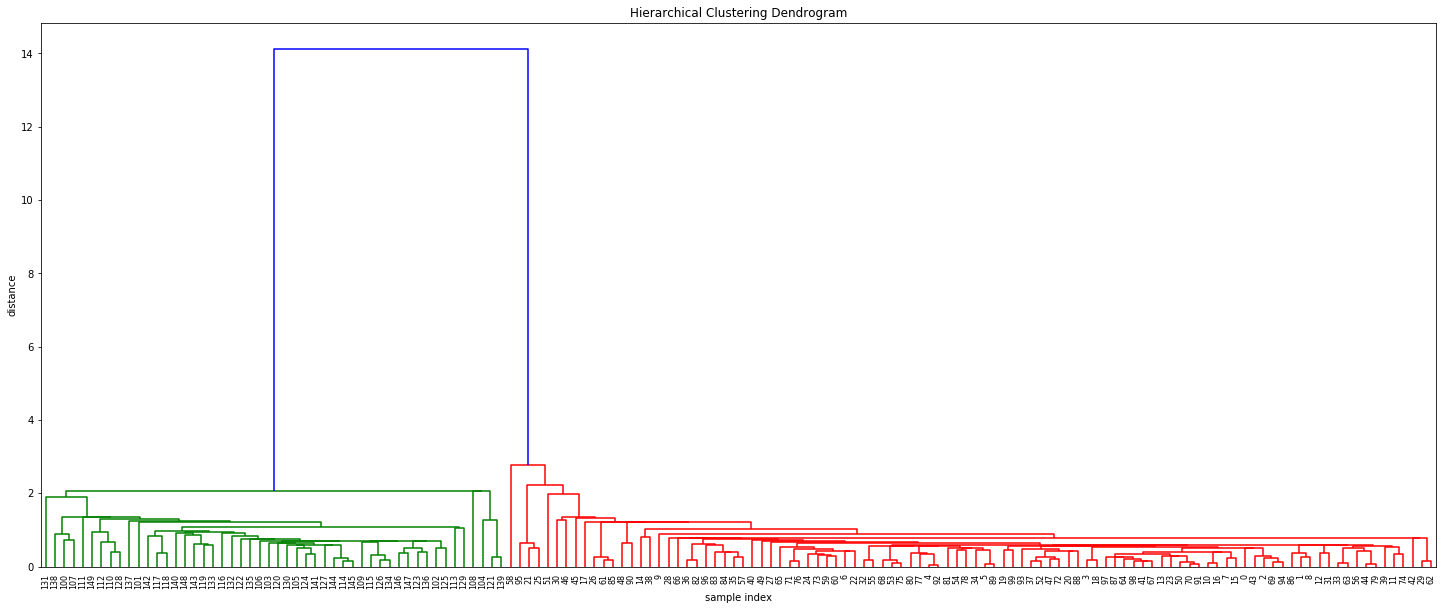

In [12]:
# calculate and construct the dendrogram 
# calculate full dendrogram

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

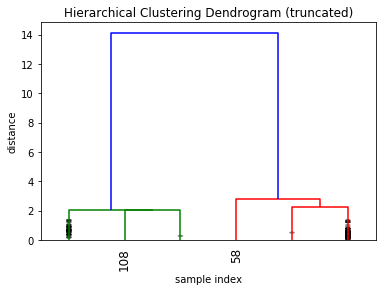

In [13]:
# trimming and truncating the dendrogram 

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=6,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in
                            #truncated branches
)
plt.show()

# from documentation of "lastp"
# The last p non-singleton formed in the linkage are the only
# non-leaf nodes in the linkage; 
# they correspond to rows Z[n-p-2:end] in Z.
# All other non-singleton clusters are contracted into leaf nodes.

### Hierarchical clustering with `sklearn` on Iris (because it's there)

**[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)** for AgglomerativeClustering in `sklearn`


**[A great example of using manhattan distance](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_clustering_metrics.html#sphx-glr-auto-examples-cluster-plot-agglomerative-clustering-metrics-py)** with agglomerative clustering in `sklearn`.

In [14]:
# we can also use the scikitlearn module hierarchical clustering
# to perform the same task

from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KernelDensity
np.random.seed(2000)

In [15]:
# try clustering on the iris dataset

from sklearn.datasets import load_iris
iris = load_iris()

# in this case, we won't be working with predicting labels,
# so we will only use the features (X)

X_iris = iris.data
y_iris = iris.target

In [48]:
X_iris[:,0:3]

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5. , 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5],
       [5.4, 3.7, 1.5],
       [4.8, 3.4, 1.6],
       [4.8, 3. , 1.4],
       [4.3, 3. , 1.1],
       [5.8, 4. , 1.2],
       [5.7, 4.4, 1.5],
       [5.4, 3.9, 1.3],
       [5.1, 3.5, 1.4],
       [5.7, 3.8, 1.7],
       [5.1, 3.8, 1.5],
       [5.4, 3.4, 1.7],
       [5.1, 3.7, 1.5],
       [4.6, 3.6, 1. ],
       [5.1, 3.3, 1.7],
       [4.8, 3.4, 1.9],
       [5. , 3. , 1.6],
       [5. , 3.4, 1.6],
       [5.2, 3.5, 1.5],
       [5.2, 3.4, 1.4],
       [4.7, 3.2, 1.6],
       [4.8, 3.1, 1.6],
       [5.4, 3.4, 1.5],
       [5.2, 4.1, 1.5],
       [5.5, 4.2, 1.4],
       [4.9, 3.1, 1.5],
       [5. , 3.2, 1.2],
       [5.5, 3.5, 1.3],
       [4.9, 3.6, 1.4],
       [4.4, 3. , 1.3],
       [5.1, 3.4, 1.5],
       [5. , 3.5, 1.3],
       [4.5, 2.3

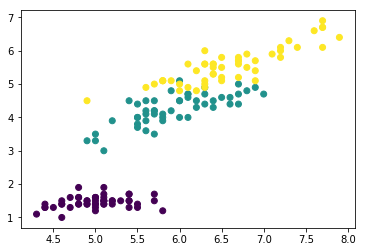

In [20]:
plt.scatter(X_iris[:,0],X_iris[:,2], c=y_iris);

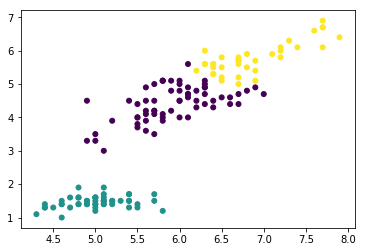

In [67]:
iris_cluster = AgglomerativeClustering(n_clusters=3)
iris_cluster
pred_iris_clust = iris_cluster.fit_predict(X_iris)
plt.scatter(X_iris[:, 0], X_iris[:, 2], c = pred_iris_clust, s = 25);

[0.6867350732769776]
[0.6867350732769776, 0.5543236611296415]
[0.6867350732769776, 0.5543236611296415, 0.4889670857554686]
[0.6867350732769776, 0.5543236611296415, 0.4889670857554686, 0.48438258927905886]
[0.6867350732769776, 0.5543236611296415, 0.4889670857554686, 0.48438258927905886, 0.3592376192603073]
[0.6867350732769776, 0.5543236611296415, 0.4889670857554686, 0.48438258927905886, 0.3592376192603073]
[0.6867350732769776, 0.5543236611296415, 0.4889670857554686, 0.48438258927905886, 0.3592376192603073]
[0.6867350732769776, 0.5543236611296415, 0.4889670857554686, 0.48438258927905886, 0.3592376192603073]
[0.6867350732769776, 0.5543236611296415, 0.4889670857554686, 0.48438258927905886, 0.3592376192603073]
[0.6867350732769776, 0.5543236611296415, 0.4889670857554686, 0.48438258927905886, 0.3592376192603073]
[0.6867350732769776, 0.5543236611296415, 0.4889670857554686, 0.48438258927905886, 0.3592376192603073]
[0.6867350732769776, 0.5543236611296415, 0.4889670857554686, 0.48438258927905886,

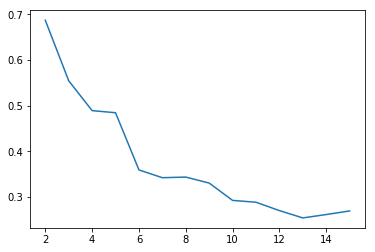

In [73]:
scores = []
for i in range(2, 16):
    iris_cluster = AgglomerativeClustering(n_clusters=i)
    pred_iris_clust = iris_cluster.fit_predict(X_iris)
    scores.append(silhouette_score(X_iris, pred_iris_clust))
    print(scores[:5])
plt.plot(range(2,16), scores)

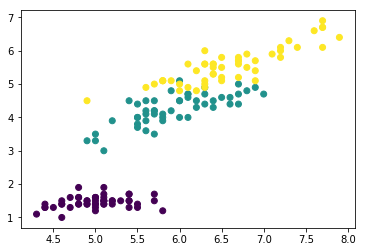

In [54]:
# compare it to the actual truth

plt.scatter(X_iris[:,0],X_iris[:,2], c = y_iris);

#### Evaluate

To evaluate you might try different numbers of clusters and compare their silhouette score as you did with kmeans.

In [68]:
# evaluation - silhouette score

from sklearn.metrics import silhouette_score
silhouette_score(X_iris, pred_iris_clust)

0.5543236611296415

### Evaluating number of clusters / Cut points
For hierarchical agglomerative clustering, or clustering in general, it is generally difficult to truly evaluate the results. Therefore, it is up you, the data scientists, to decide.

**[Stanford has a good explanation on page 380](https://nlp.stanford.edu/IR-book/pdf/17hier.pdf)** of your options for picking the cut-off. 

When we are viewing dendrograms for hierarchical agglomerative clustering, we can visually examine where the natural cutoff is, despite it not sounding exactly statistical, or scientific. We might want to interpret the clusters and assign meanings to them depending on domain-specific knowledge and shape of dendrogram. However, we can evaluate the quality of our clusters using measurements such as Sihouette score discussed in the k-means lectures. 

## Advantages & Disadvantages of hierarchical clustering

#### Advantages
- Intuitive and easy to implement
- More informative than k-means because it takes individual relationship into consideration
- Allows us to look at dendrogram and decide number of clusters

#### Disadvantages
- Very sensitive to outliers
- Cannot undo the previous merge, which might lead to problems later on 


### Further reading

- [from MIT on just hierarchical](http://web.mit.edu/6.S097/www/resources/Hierarchical.pdf)
- [from MIT comparing clustering methods](http://www.mit.edu/~9.54/fall14/slides/Class13.pdf)
- [fun CMU slides on clustering](http://www.cs.cmu.edu/afs/andrew/course/15/381-f08/www/lectures/clustering.pdf)